<a href="https://colab.research.google.com/github/Kassa-Hun/Deep-Learning/blob/main/Code/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier


In [76]:
# Load the data
dataset_url="https://raw.githubusercontent.com/Kassa-Hun/Deep-Learning/main/Dataset/Churn_Modelling.csv"
data=pd.read_csv(dataset_url)

#Features selection
X=data.iloc[:,3:-1].values  #Independent variables
y=data.iloc[:,-1].values    #Dependent variables

#Encoding categorical features-Geography and Gender columns
labelencoder=LabelEncoder()
X[:,2]=leablencoder.fit_transform(X[:,2])

columntransform=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X=np.array(columntransform.fit_transform(X))

# Split the dataset as training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

#Feature scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)



In [78]:
#Initialize ANN
classifier=Sequential()
#Add input and initial hidden layers
classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=12))
#Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
#Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

#Compiling ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Training the ANN on the Training dataset
classifier.fit(X_train, y_train, batch_size=10,epochs=100)

#Predicting the Test set
y_preds=classifier.predict(X_test)
y_preds=(y_preds > 0.5)
y_preds

"""
Homework:
Use our ANN model to predict if the customer with the following informations will leave the bank: 
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $ 60000
Number of Products: 2
Does this customer have a credit card? Yes
Is this customer an Active Member: Yes
Estimated Salary: $ 50000
So, should we say goodbye to that customer?

Solution:
"""

print (classifier.predict(sc.fit_transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5)


Epoch 1/100
800/800 [==============================] - 1s 989us/step - loss: 0.5594 - accuracy: 0.8005
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4296 - accuracy: 0.7990
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4238 - accuracy: 0.7933
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4174 - accuracy: 0.8218
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.8214
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8332
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4109 - accuracy: 0.8352
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4004 - accuracy: 0.8367
Epoch 9/100
800/800 [==============================] - 1s 999us/step - loss: 0.4162 - accuracy: 0.8279
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4116 - ac

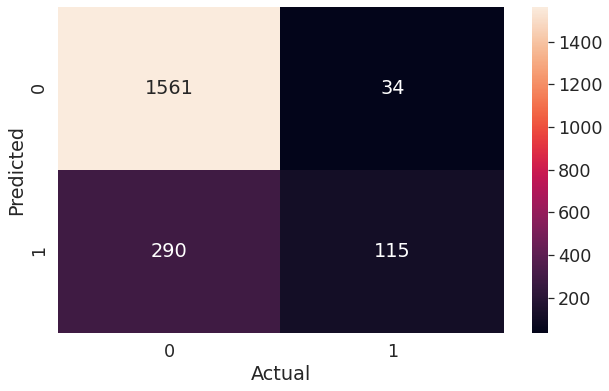

In [79]:
#Making the Confusion Matrix
fig,ax=plt.subplots(figsize=(10,6))
sns.set(font_scale=1.6)
confm=confusion_matrix(y_test,y_preds)
sns.heatmap(confm,annot=True,fmt='d');
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show();


In [85]:
def build_classifier(optimizer):
  ann=Sequential()
  ann.add(Dense(units=6,activation='relu', kernel_initializer='uniform',input_dim=12))
  ann.add(Dense(units=6,activation='relu', kernel_initializer='uniform'))
  ann.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
  ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return ann
ann=KerasClassifier(build_fn=build_classifier)
parameters={
    'batch_size':[25,32],
    'nb_epoch':[100,500],
    'optimizer':['adam','rmsprop']
}

grid_search=GridSearchCV(estimator=ann,param_grid=parameters,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)




Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   57.5s finished


320/320 [==============================] - 1s 1ms/step - loss: 0.6372 - accuracy: 0.7863


GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3441d45350>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [25, 32], 'nb_epoch': [100, 500],
                         'optimizer': ['adam', 'rmsprop']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [86]:
grid_search.best_params_

{'batch_size': 25, 'nb_epoch': 100, 'optimizer': 'adam'}

In [87]:
grid_search.best_score_

0.7960000097751617